In [96]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.io import fits

mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix',
                            'image.cmap': 'viridis'})

path = '/astro/store/gradscratch/tmp/scw7/tessData/lightcurves/sec7/'

In [97]:
# Take a look at my flare stats
df = pd.read_csv('7_flare_out.csv')
df = df[np.isfinite(df['t0'])] # Why are some t0 values NaN? There is a flare flux in these rows
print(str(len(df)) + ' flare detections')

1993 flare detections


Text(0, 0.5, 'Peak/Median Flux')

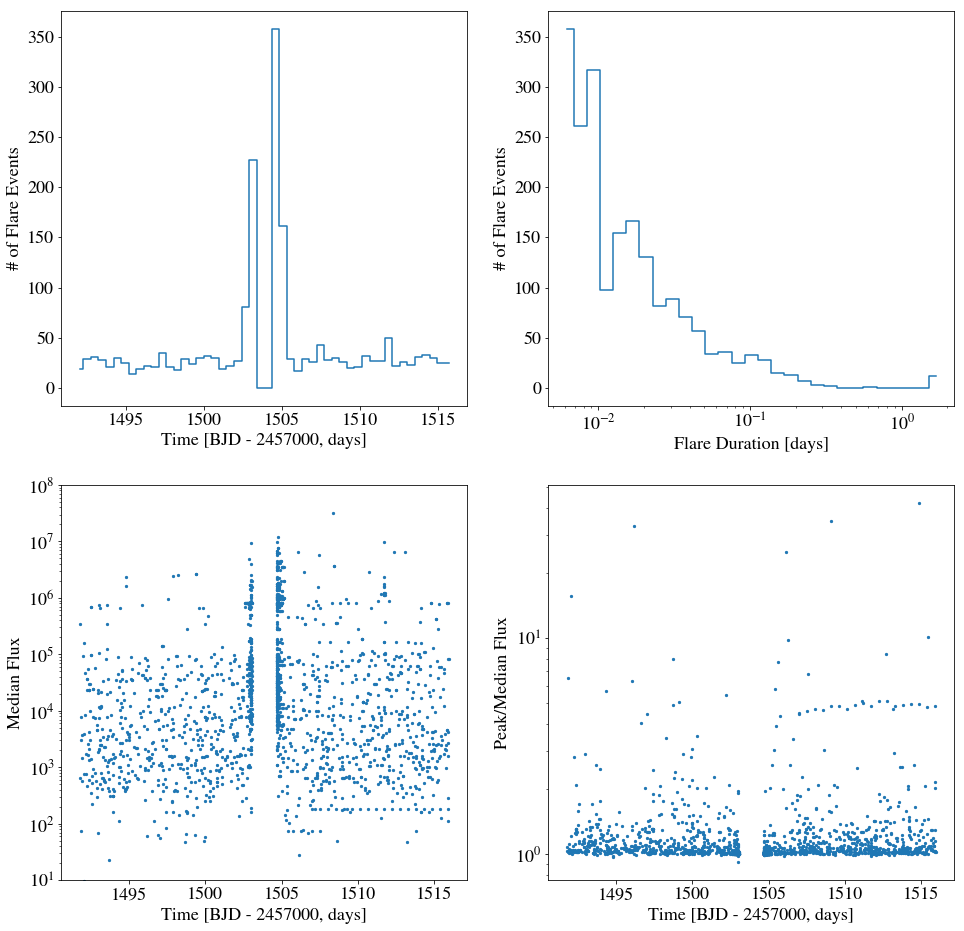

In [98]:
fig, axes = plt.subplots(figsize=(16,16), nrows=2, ncols=2)

hist, bins = np.histogram(df['t0'], bins=50)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][0].plot(bins, hist, linestyle='steps-mid')
axes[0][0].set_xlabel('Time [BJD - 2457000, days]')
axes[0][0].set_ylabel('# of Flare Events')

duration = df['t1'] - df['t0']
bins = np.logspace(np.log10(np.min(duration)), np.log10(np.max(duration)), num=30)
hist, bins = np.histogram(duration, bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][1].semilogx(bins, hist, linestyle='steps-mid')
axes[0][1].set_xlabel('Flare Duration [days]')
axes[0][1].set_ylabel('# of Flare Events')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][0].scatter(df['t0'], df['med'], s=5)
axes[1][0].set_yscale('log')
axes[1][0].set_ylim(10, 1e8)
axes[1][0].set_xlabel('Time [BJD - 2457000, days]')
axes[1][0].set_ylabel('Median Flux')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][1].scatter(df['t0'], df['peak']/df['med'], s=5)
axes[1][1].set_yscale('log')
axes[1][1].set_xlabel('Time [BJD - 2457000, days]')
axes[1][1].set_ylabel('Peak/Median Flux')

In [154]:
# Lots of flare detections around the break in the data
mask = (df['t0'] > 1502.5) & (df['t0'] < 1505)
df[mask]

,Unnamed: 0,TIC,i0,i1,t0,t1,med,peak
0,27.0,452926293,7818.0,7869.0,1504.710803,1504.781637,7.911032e+05,7.933664e+05
1,27.0,452926293,7875.0,7885.0,1504.789970,1504.803859,7.911032e+05,7.933166e+05
2,27.0,452926293,7898.0,7902.0,1504.821915,1504.827470,7.911032e+05,7.929528e+05
12,63.0,19941715,7715.0,7805.0,1504.710270,1504.835273,9.912838e+05,9.955219e+05
13,88.0,59764377,7477.0,7497.0,1503.037083,1504.731529,8.609863e+04,8.644869e+04
14,88.0,59764377,7499.0,7506.0,1504.734307,1504.744029,8.609863e+04,8.639327e+04
24,217.0,349275562,7933.0,7955.0,1504.705811,1504.736367,3.507817e+04,3.519540e+04
33,270.0,130572079,7949.0,7962.0,1504.707858,1504.725914,1.794758e+04,1.828251e+04
34,270.0,130572079,7964.0,7969.0,1504.728692,1504.735636,1.794758e+04,1.827990e+04
35,270.0,130572079,7971.0,7989.0,1504.738414,1504.763414,1.794758e+04,1.829725e+04


tess2019006130736-s0007-0000000452926293-0131-s_lc.fits


/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


Text(0, 0.5, 'Flux [e-/s]')

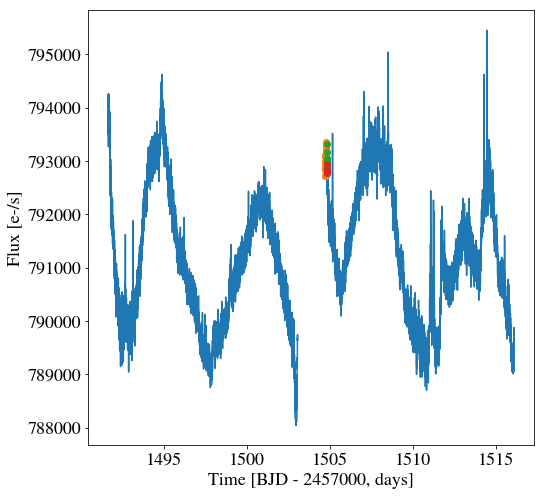

In [155]:
TIC = df[mask].iloc[0]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

tstart = df[mask][df['TIC'] == TIC]['t0'].values
tstop = df[mask][df['TIC'] == TIC]['t1'].values

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)

for idx in range(len((tstart))):
    indices = np.where((tess_bjds >= tstart[idx]) & (tess_bjds <= tstop[idx]))[0]
    axes.plot(tess_bjds[indices], pdcsap_fluxes[indices], 'o')

axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')

tess2019006130736-s0007-0000000019941715-0131-s_lc.fits


/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


Text(0, 0.5, 'Flux [e-/s]')

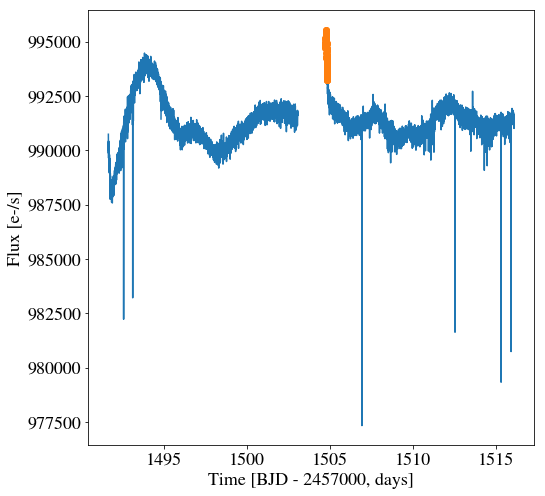

In [156]:
TIC = df[mask].iloc[3]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

tstart = df[mask][df['TIC'] == TIC]['t0'].values
tstop = df[mask][df['TIC'] == TIC]['t1'].values

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)

for idx in range(len((tstart))):
    indices = np.where((tess_bjds >= tstart[idx]) & (tess_bjds <= tstop[idx]))[0]
    axes.plot(tess_bjds[indices], pdcsap_fluxes[indices], 'o')

axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')

tess2019006130736-s0007-0000000059764377-0131-s_lc.fits


/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


Text(0, 0.5, 'Flux [e-/s]')

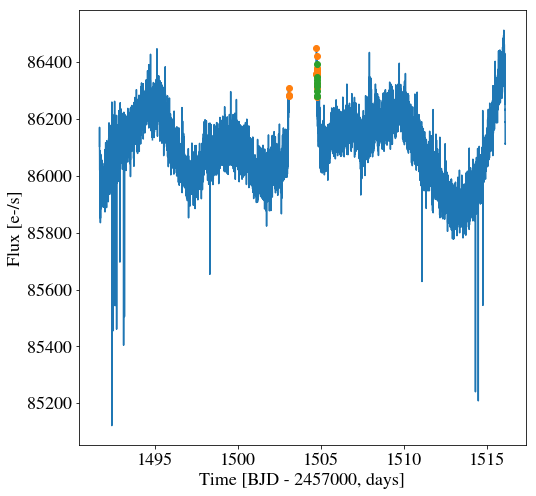

In [157]:
TIC = df[mask].iloc[4]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

tstart = df[mask][df['TIC'] == TIC]['t0'].values
tstop = df[mask][df['TIC'] == TIC]['t1'].values

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)

for idx in range(len((tstart))):
    indices = np.where((tess_bjds >= tstart[idx]) & (tess_bjds <= tstop[idx]))[0]
    axes.plot(tess_bjds[indices], pdcsap_fluxes[indices], 'o')

axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')

In [103]:
peakDivMed = df['peak']/df['med']
numBelowMed = len(peakDivMed[peakDivMed < 1])
print('There are ' + str(numBelowMed) + ' flare detections in which the peak flux is smaller than the median.')

There are 45 flare detections in which the peak flux is smaller than the median.


There is a horizontal line of points in plot 3 that falls between 186.5 and 187 on the y axis and 1506 to 1516 on the x axis. These flares all come from TIC 412345587. Lets see whats going on with this light curve.

In [104]:
mask = (df['med'] > 186.5) & (df['med'] < 187) & (df['i0'] > 9000) & (df['i0'] < 16000)
df[mask]

,Unnamed: 0,TIC,i0,i1,t0,t1,med,peak
1761,18176.0,412345587,9797.0,9803.0,1506.986140,1506.994473,186.792755,830.919373
1762,18176.0,412345587,10173.0,10185.0,1507.508359,1507.525025,186.792755,858.020142
1763,18176.0,412345587,10544.0,10556.0,1508.033354,1508.050021,186.792755,873.188660
1764,18176.0,412345587,10924.0,10933.0,1508.561127,1508.573627,186.792755,868.946411
1765,18176.0,412345587,11300.0,11313.0,1509.083344,1509.101399,186.792755,900.406799
1766,18176.0,412345587,11680.0,11695.0,1509.611116,1509.631949,186.792755,906.895935
1767,18176.0,412345587,12060.0,12072.0,1510.138887,1510.155554,186.792755,879.683411
1768,18176.0,412345587,12437.0,12450.0,1510.662491,1510.680547,186.792755,918.966248
1769,18176.0,412345587,12807.0,12823.0,1511.187484,1511.209706,186.792755,934.388000
1770,18176.0,412345587,13189.0,13201.0,1511.718031,1511.734697,186.792755,904.643433


Text(0, 0.5, 'Flux [e-/s]')

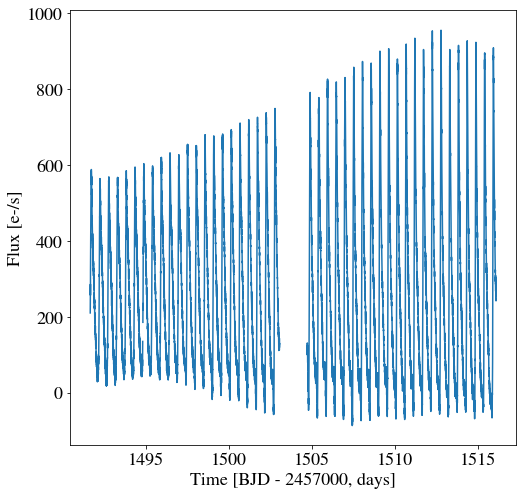

In [115]:
file = 'tess2019006130736-s0007-0000000412345587-0131-s_lc.fits'

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)
axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')

Lets look at the flare detections in which the peak is smaller than the median

In [160]:
mask = df['peak'] < df['med']
df[mask]

,Unnamed: 0,TIC,i0,i1,t0,t1,med,peak
66,460.0,38827910,12239.0,12248.0,1510.639800,1510.653688,2.056437e+04,2.048149e+04
88,729.0,262609754,1234.0,1238.0,1493.796260,1493.801816,8.369883e+03,8.282078e+03
108,1036.0,152076382,8080.0,8088.0,1504.709047,1504.720158,3.432531e+04,3.414995e+04
175,1802.0,279614617,4387.0,4474.0,1498.364810,1498.485644,3.488734e+04,3.453588e+04
181,1871.0,124249007,6557.0,6561.0,1501.024048,1501.029603,4.416496e+04,4.415664e+04
276,2987.0,64962689,8003.0,8009.0,1502.994059,1503.002392,2.754500e+04,2.747088e+04
277,2987.0,64962689,8023.0,8037.0,1503.021837,1503.041281,2.754500e+04,2.750885e+04
358,3515.0,264313563,7636.0,7640.0,1504.801118,1504.806673,9.974536e+05,9.974141e+05
487,4514.0,255590987,12292.0,12297.0,1510.522370,1510.529314,1.367759e+04,1.358360e+04
616,6194.0,285413207,8151.0,8166.0,1504.707774,1504.728607,1.713377e+04,1.713046e+04


tess2019006130736-s0007-0000000038827910-0131-s_lc.fits


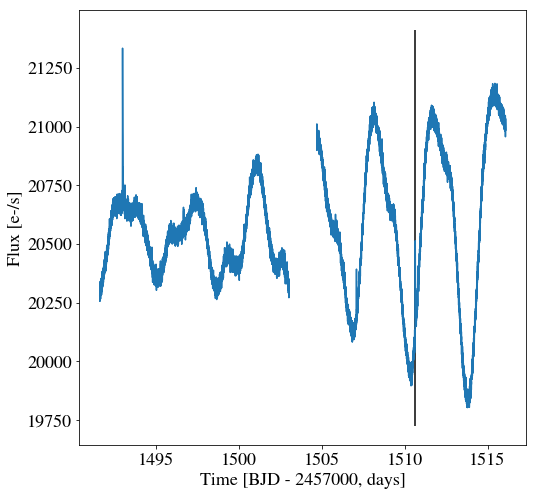

In [163]:
TIC = df[mask].iloc[0]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)
axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')
ymin, ymax = axes.get_ylim()
axes.vlines(df[mask].iloc[0]['t0'], ymin, ymax)

tess2019006130736-s0007-0000000262609754-0131-s_lc.fits


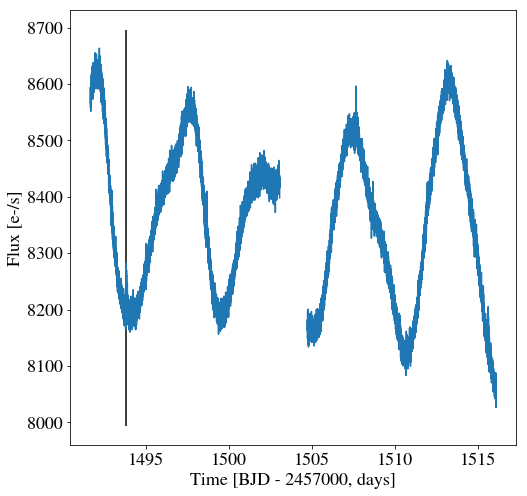

In [164]:
TIC = df[mask].iloc[1]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)
axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')
ymin, ymax = axes.get_ylim()
axes.vlines(df[mask].iloc[1]['t0'], ymin, ymax)

tess2019006130736-s0007-0000000152076382-0131-s_lc.fits


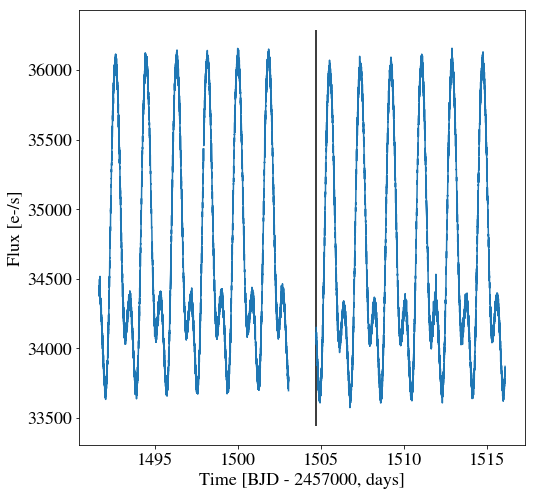

In [165]:
TIC = df[mask].iloc[2]['TIC']
TIC_str = str(int(TIC)).zfill(16)
file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'

print(file)

with fits.open(path+file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(tess_bjds, pdcsap_fluxes)
axes.set_xlabel('Time [BJD - 2457000, days]')
axes.set_ylabel('Flux [e-/s]')
ymin, ymax = axes.get_ylim()
axes.vlines(df[mask].iloc[2]['t0'], ymin, ymax)